In [16]:
import pydelaunay
import numpy as np

In [17]:
points = np.random.randint(low=0, high=1024, size=(512, 2))
points = np.unique(points, axis=0)
points.shape

(512, 2)

In [18]:
triangulation = pydelaunay.delaunay(points)

In [19]:
print(triangulation.vertices.shape, triangulation.triangles.shape)

(512, 2) (1001, 3)


### Find triangle, with a given point inside

In [20]:
p = [128, 128]
t_index: int = triangulation.find_triangle(*p)
print(f'triangle index = {t_index}\n triangles vertices are = {triangulation.vertices[triangulation.triangles[t_index]]}')


triangle index = 397
 triangles vertices are = [[106 177]
 [123  80]
 [190 105]]


### Plotting delaunay graph

In [21]:
import networkx as nx
from tqdm.notebook import tqdm
from itertools import combinations
from matplotlib import pyplot as plt

In [22]:
G = nx.Graph()
for t in tqdm(triangulation.triangles):
    vertices = list(map(tuple, triangulation.vertices[t]))
    for v in vertices:
        G.add_node(v)
    for u, v in combinations(vertices, 2):
        G.add_edge(*sorted([u, v]))

  0%|          | 0/1001 [00:00<?, ?it/s]

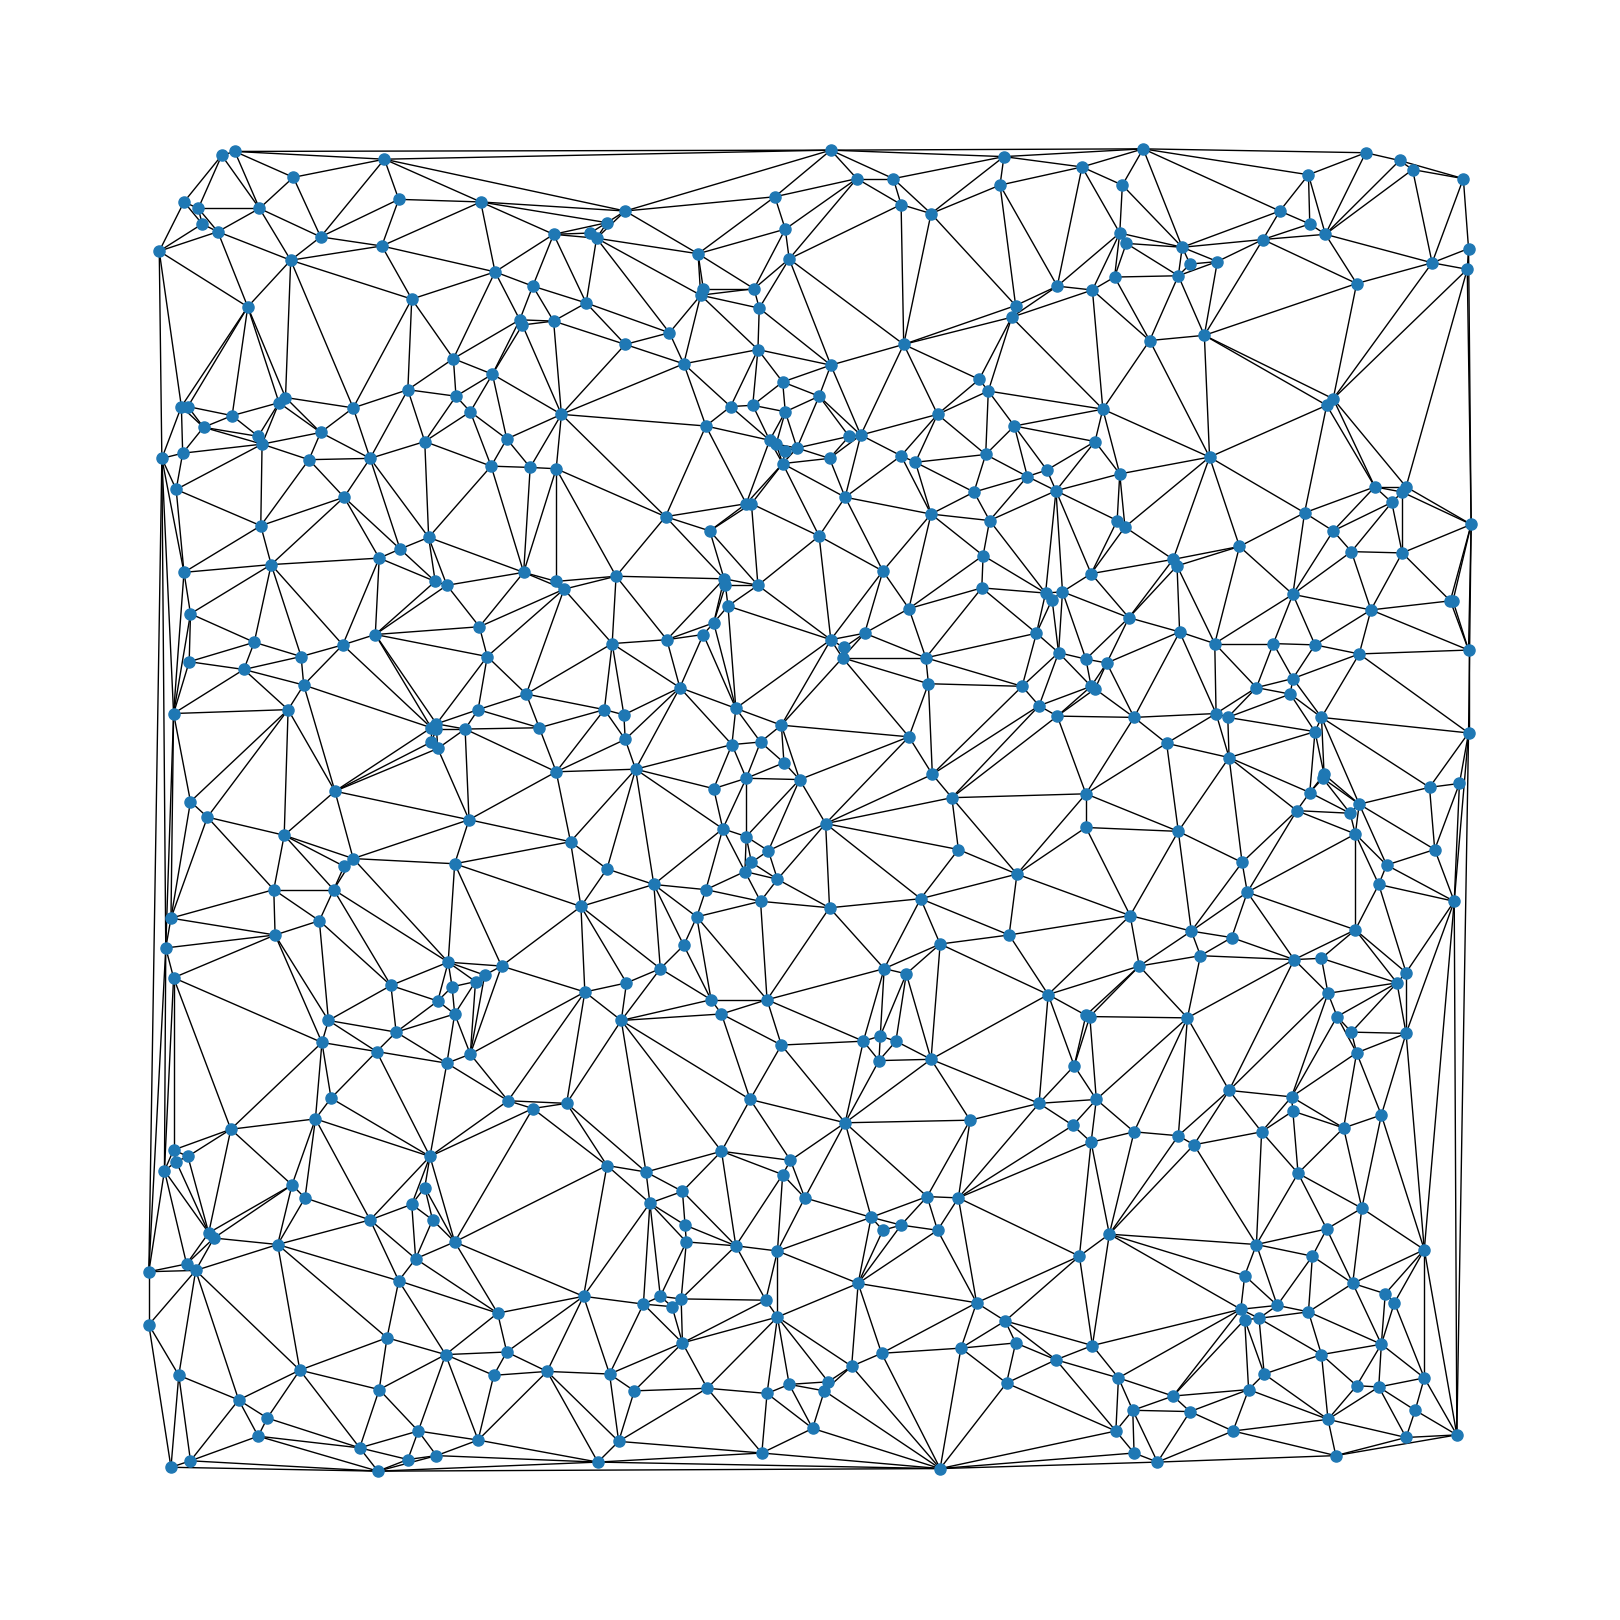

In [23]:
plt.figure(figsize=(16, 16))
nx.draw(G, pos={n: n for n in G.nodes}, node_size=64)

### Plotting SciPy Delaunay graph

In [24]:
from scipy.spatial import Delaunay

In [25]:
sptri = Delaunay(points)
sptri_points = sptri.points.astype(np.int32)

In [26]:
S = nx.Graph()
for t in tqdm(sptri.simplices):
    vertices = list(map(tuple, sptri_points[t]))
    for v in vertices:
        S.add_node(v)
    for u, v in combinations(vertices, 2):
        S.add_edge(*sorted([u, v]))

  0%|          | 0/1003 [00:00<?, ?it/s]

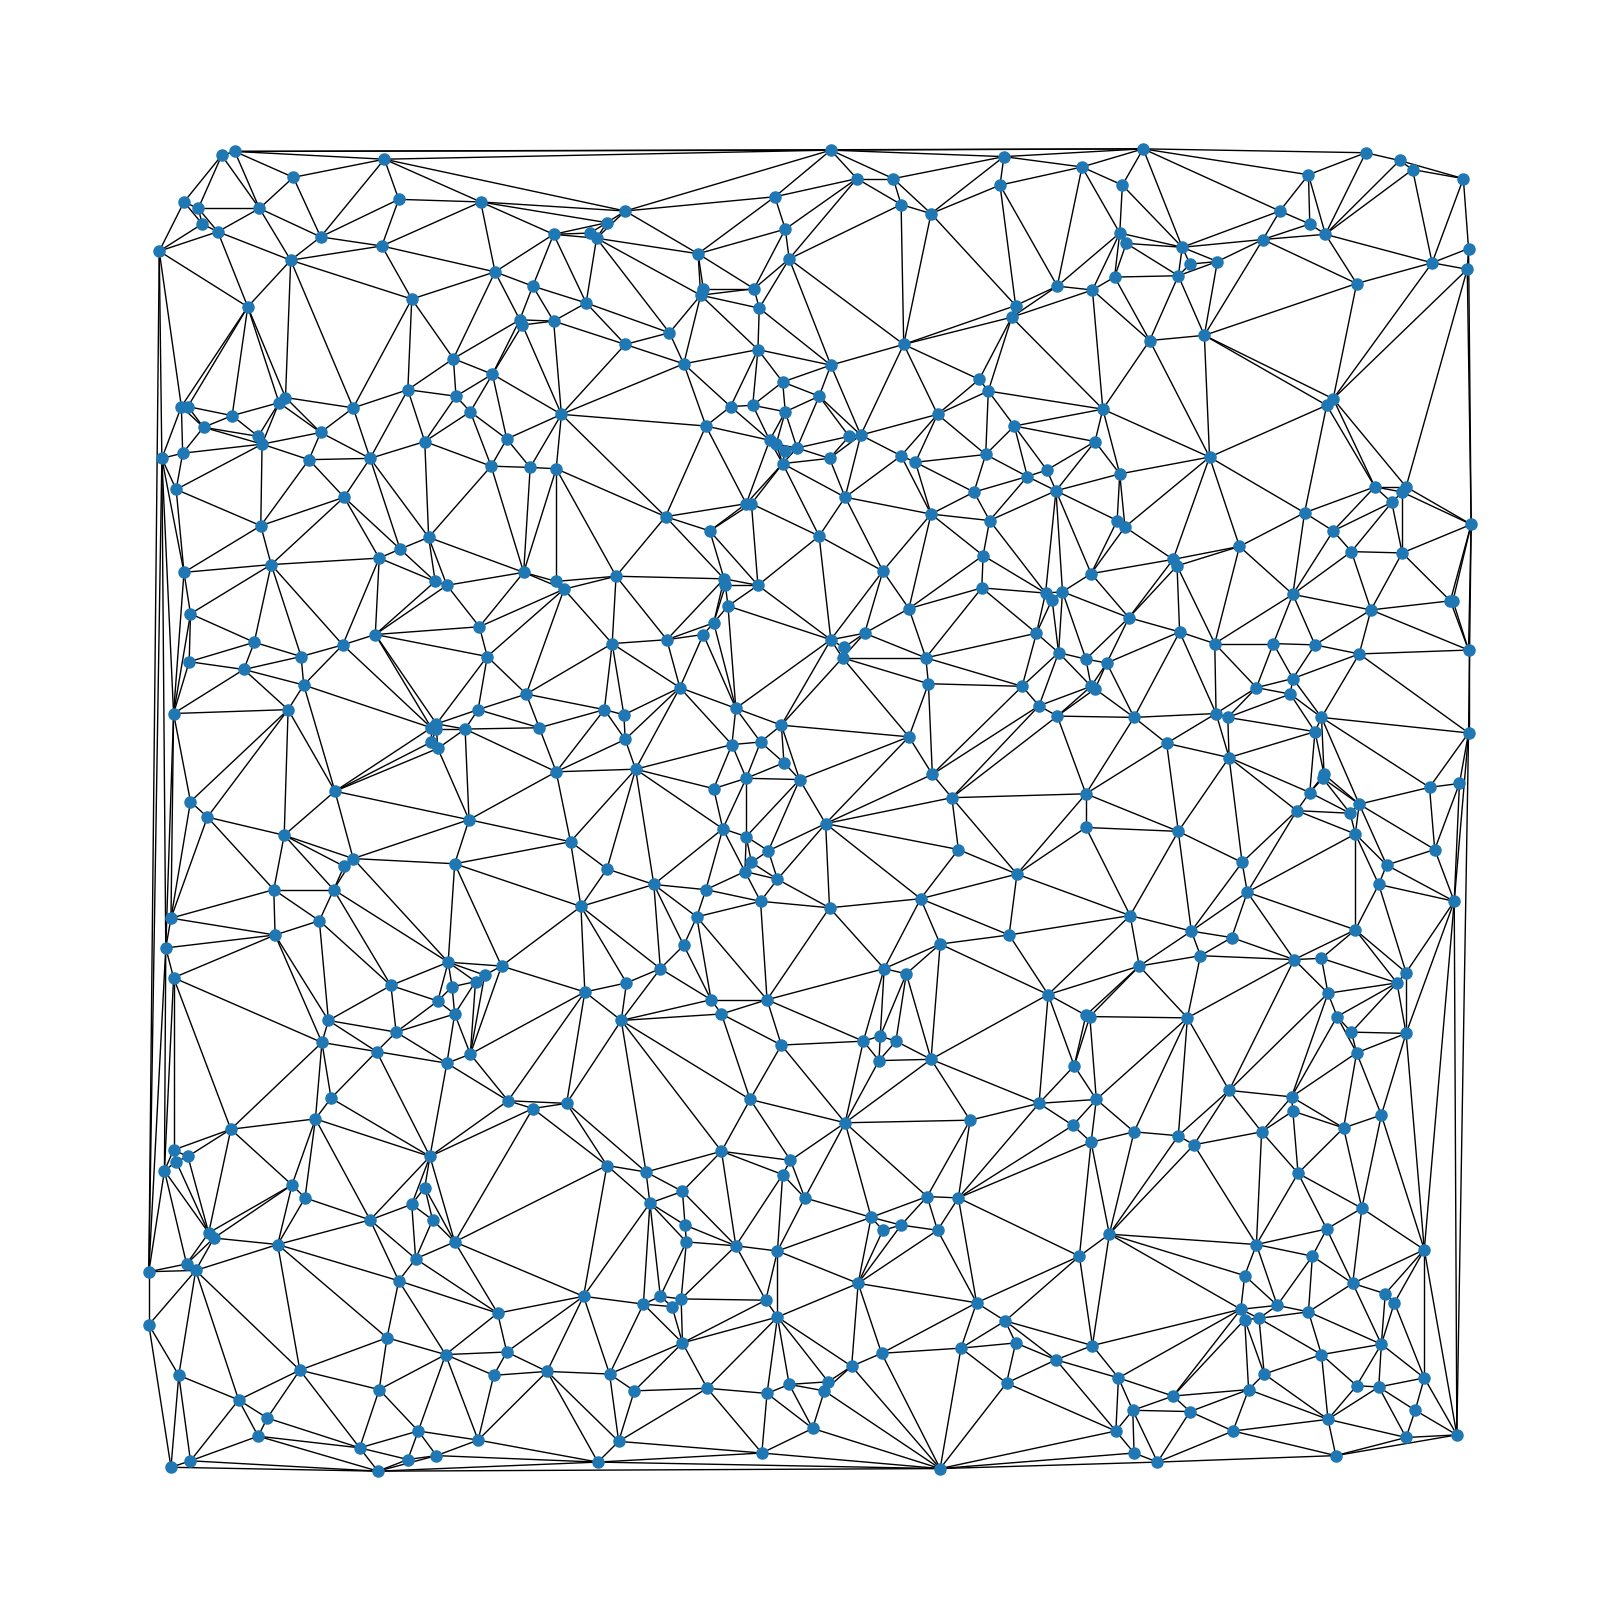

In [27]:
plt.figure(figsize=(16, 16))
nx.draw(S, pos={n: n for n in S.nodes}, node_size=64)

### Graphs equality

In [28]:
nx.utils.graphs_equal(G, S)

False

In [29]:
tt = set(map(tuple, map(sorted, triangulation.triangles)))
st = set(map(tuple, map(sorted, sptri.simplices)))

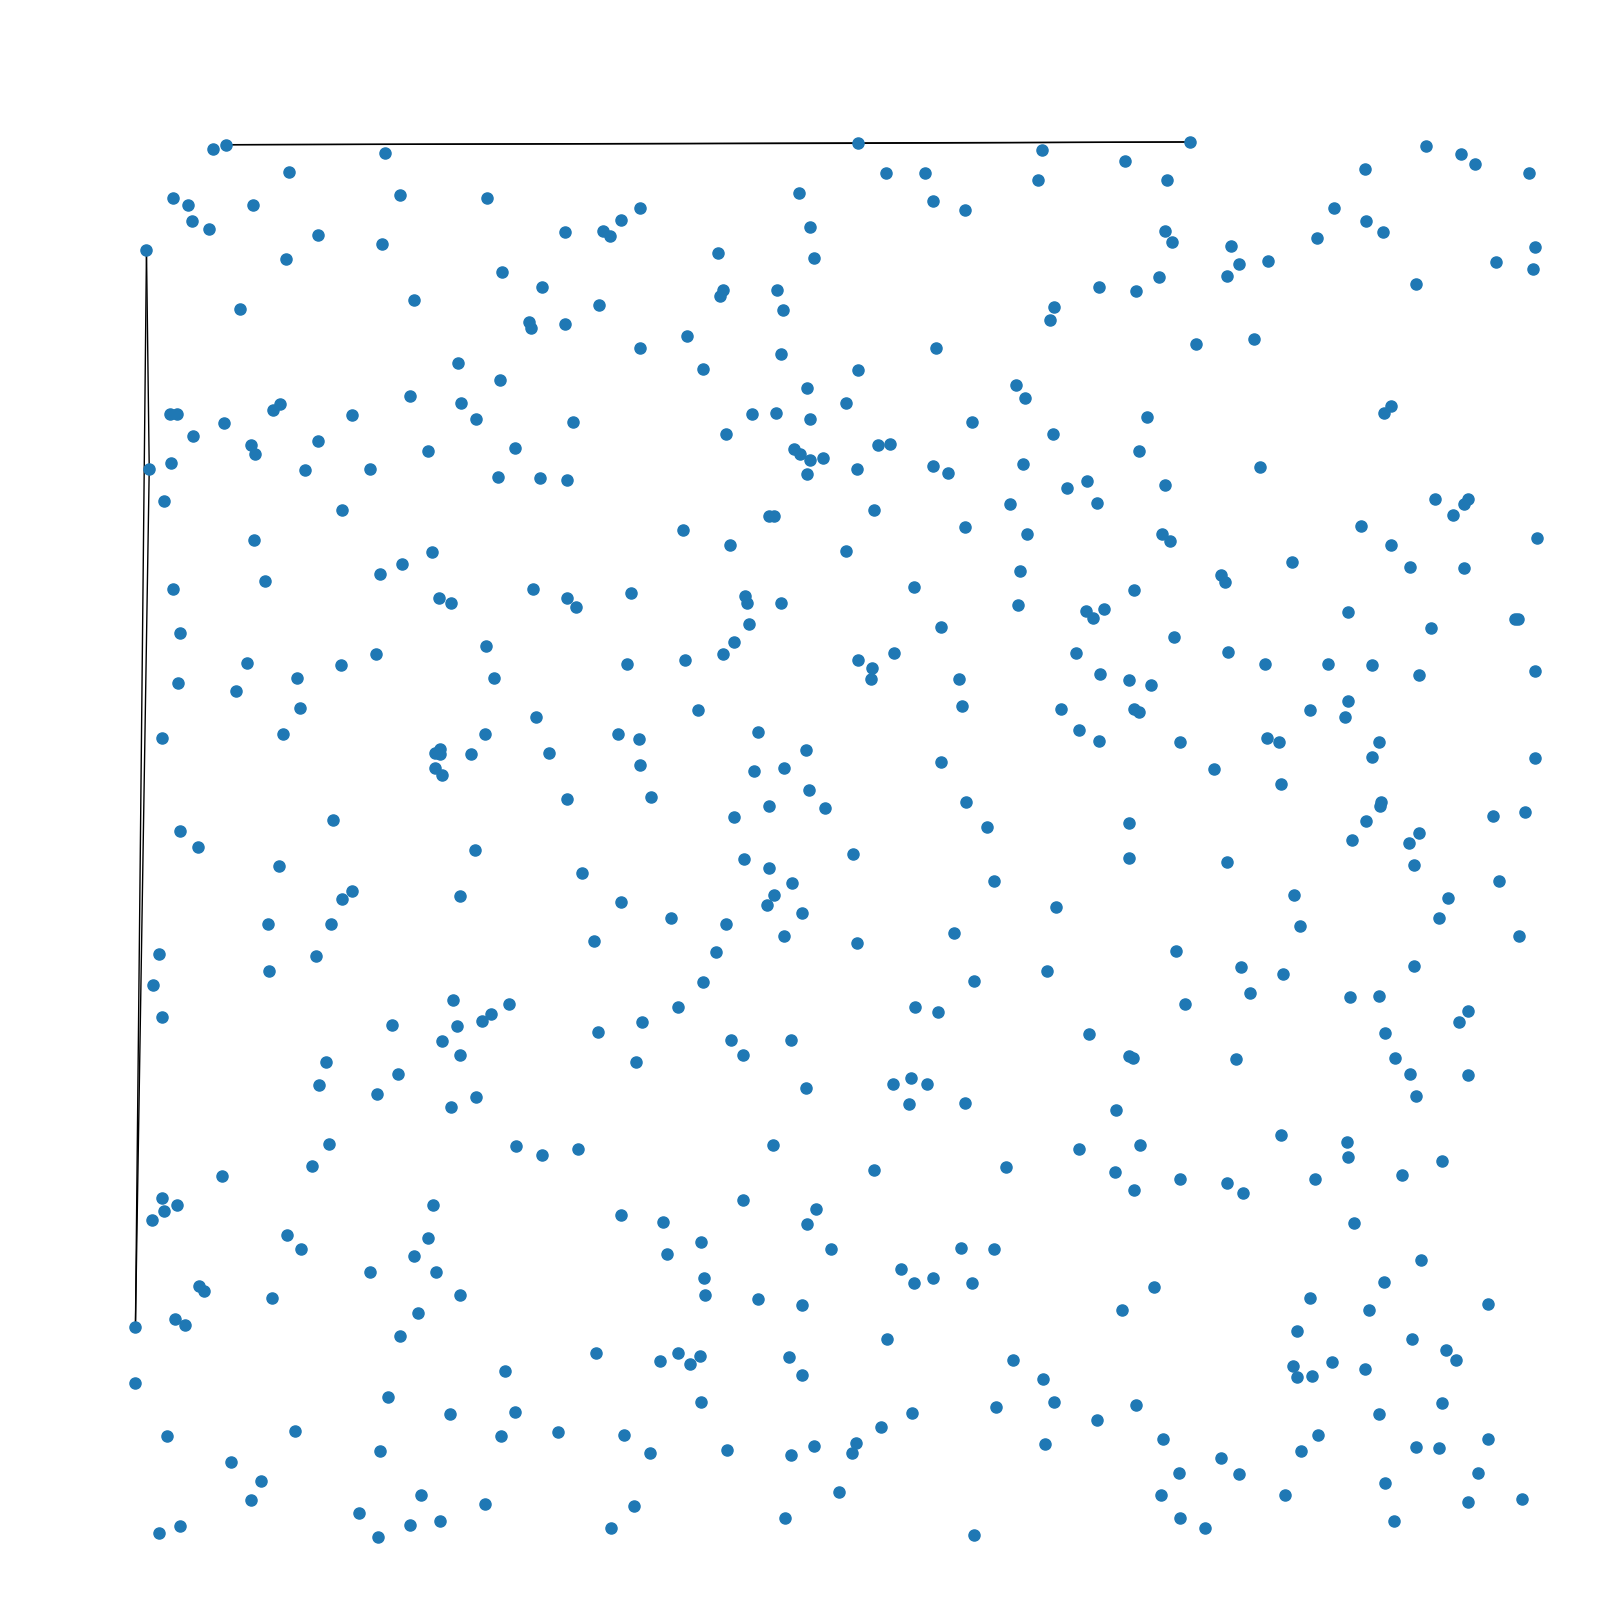

In [30]:
F = nx.Graph()
F.add_nodes_from(G.nodes)
for t in st - tt:
    for u, v in combinations(t, 2):
        F.add_edge(*sorted(map(tuple, [points[u], points[v]])))
plt.figure(figsize=(16, 16))
nx.draw(F, pos={n: n for n in F.nodes}, node_size=64)